Data Cleaning

In [61]:
# path to cleaned data
file_path_ad = "../Raw_data/application_data_cleaned.csv"
#file_path_pad = "../Raw_data/previous_application.csv"

In [62]:
# Import findspark and initialize. 
import findspark
findspark.init()

In [63]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import StructType,StructField,StringType, DateType,IntegerType

# Create a SparkSession
spark = SparkSession.builder\
    .appName("SparkSQL")\
    .config("spark.driver.memory", "8g")\
    .getOrCreate()

In [64]:
# Read in data from S3 Buckets
from pyspark import SparkFiles

df_ad = spark.read.csv(file_path_ad, header=True, inferSchema=True)
#df_pad =spark.read.csv(file_path_pad, header=True, inferSchema=True)

In [65]:
# Show application data DataFrame
df_ad.show(3)
df_ad.createOrReplaceTempView('app_data')


+------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+---------------+----------------+--------------------+--------------------+-----------------+--------------------------+----------+-------------+-----------------+---------------+-----------+----------+--------------+---------------+----------------+----------+----------+---------------+---------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+--------------------+------------------+------------------+------------------+--------------+----------------+---------------------------+------------------+--------------+-------------+-------------+-------------+-------------+------------+--------------------+--------------+-----------------------+------

In [66]:
spark.sql("cache table app_data")
spark.catalog.isCached("app_data")

True

In [76]:
q1 = """
SELECT Count(TARGET) AS `0`
FROM
app_data
WHERE TARGET = 0
"""
target0 = spark.sql(q1).show()


+------+
|     0|
+------+
|280845|
+------+



In [77]:
q2 = """
SELECT Count(TARGET) AS `1`
FROM
app_data
WHERE TARGET = 1
"""
target2 = spark.sql(q2).show()


+-----+
|    1|
+-----+
|24703|
+-----+



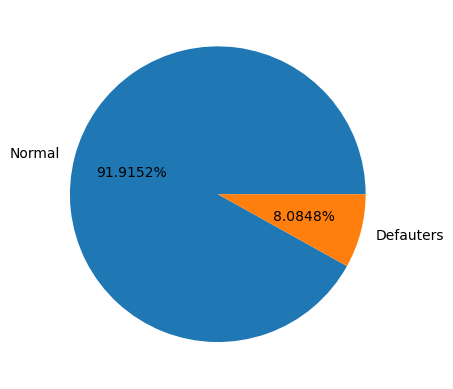

In [83]:
import matplotlib.pyplot as plt
labels = ['Normal', 'Defauters']
sizes = [280845,24703]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,autopct='%1.4f%%')
plt.show()

In [86]:
q3 = """
SELECT TARGET,CODE_GENDER, count(*) as `num`
FROM
app_data
GROUP BY TARGET,CODE_GENDER
"""
target3 = spark.sql(q3).show()

+------+-----------+------+
|TARGET|CODE_GENDER|   num|
+------+-----------+------+
|     1|          F| 14085|
|     0|          M| 93792|
|     1|          M| 10618|
|     0|          F|187049|
|     0|        XNA|     4|
+------+-----------+------+



C:\Users\zw\AppData\Local\Temp\ipykernel_30340\3962353858.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("tab20c")


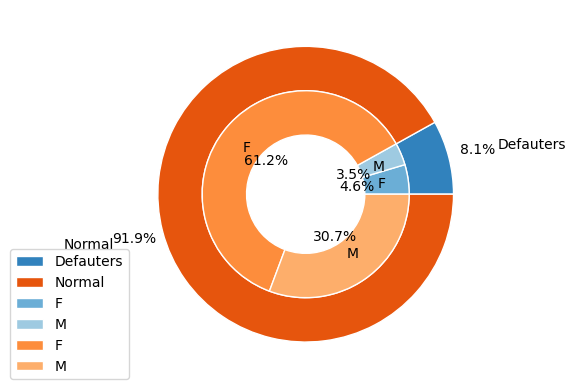

In [109]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[14085,10618], [187049, 93792]])

cmap = get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

labels_inner = ["F", "M", "F", "M"]
labels_outer = ["Defauters", "Normal"]

# outer slices
ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_outer,labeldistance=1.34,autopct='%1.1f%%',pctdistance=1.2)

# inner slices
ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, labeldistance=0.7,autopct='%1.1f%%',pctdistance=0.5)

ax.set(aspect="equal")
plt.legend(loc=(-0.3, 0))
plt.show()

In [69]:
# end spark session

#spark.stop()